In [27]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 31897    0 31897    0     0  11675      0 --:--:--  0:00:02 --:--:-- 11671
100  255k    0  255k    0     0  71929      0 --:--:--  0:00:03 --:--:-- 71909
100  399k    0  399k    0     0  86639      0 --:--:--  0:00:04 --:--:-- 86639
100  527k    0  527k    0     0  94638      0 --:--:--  0:00:05 --:--:--  104k
100  639k    0  639k    0     0  97714      0 --:--:--  0:00:06 --:--:--  130k
100  719k    0  719k    0     0  96450      0 --:--:--  0:00:07 --:--:--  140k
100  783k    0  783k    0     0  91743      0 --:--:--  0:00:08 --:--:--  103k
100  863k    0  863k    0     0  91569      0 --:--

In [28]:
import pandas as pd
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-06-30 23:00:00,7.0,15.0
2019-06-30 22:00:00,20.0,30.0
2019-06-30 21:00:00,31.0,32.0
2019-06-30 20:00:00,72.0,58.0
2019-06-30 19:00:00,58.0,77.0


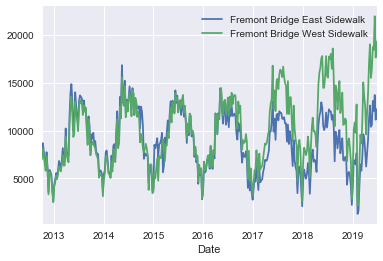

In [29]:
%matplotlib inline
data.resample("W").sum().plot()

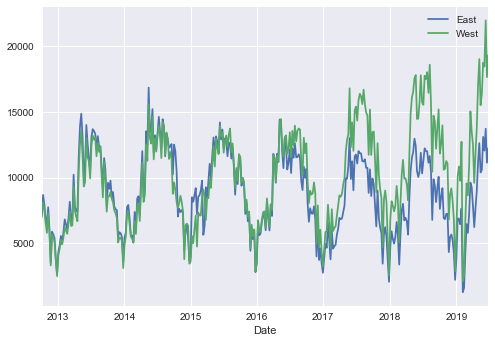

In [30]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

data.columns=["East","West"]
data.resample("W").sum().plot()

(0, 1120774.6)

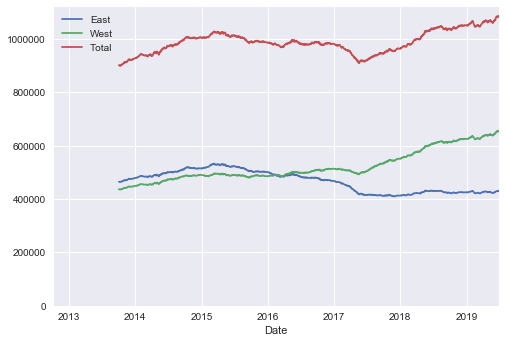

In [31]:
data["Total"] = data["East"]+data["West"]

ax = data.resample("D").sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

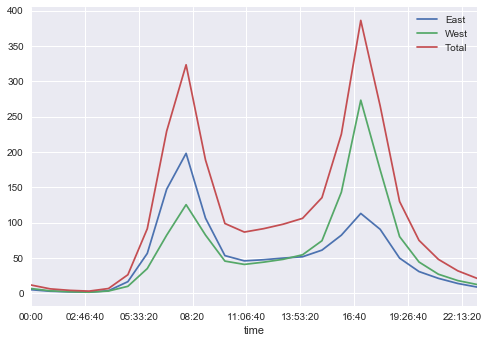

In [32]:
data.groupby(data.index.time).mean().plot()

In [33]:
pivoted = data.pivot_table("Total", index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [ ]:
pivoted.plot(legend=False,alpha=0.01)